## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import csv
plt.style.use('ggplot')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\user\AppData\Local\Temp\ipykernel_4984\3949748229.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Merge all CSV files

In [4]:
csvdir = 'weatherdata_for_students/'
# csvdir = 'brighton/'
file_list = glob.glob(os.path.join(csvdir, '*.csv'))

dfs = []

filetype='brighton'
# Read each CSV file 
for file in file_list:
    filenames = file.split('\\')[1].split('_')[0]
    if filenames == filetype:
        # filetype = 'brighton'

        df = pd.read_csv(file, header=None)
        dfs.append(df)
    # else:
    #     pass

    # df = pd.read_csv(file, header=None)
    # dfs.append(df)
    

# Concatenate all data frames in the list
result = pd.concat(dfs, ignore_index=True)

set1 = result[result[0] != '0']
set1 = set1[set1[0] != 'datetime']

header_cols = ['datetime','temp','dew','humidity','precip','precipprob','preciptype','snow','snowdepth','windspeed','winddir','sealevelpressure','cloudcover','solarradiation','solarenergy','uvindex']
# # Save the merged data to a new CSV file

set1.to_csv(f'{filetype}_data.csv', index=False, header=header_cols)



## Load and explore the data set

In [2]:
#  read the CSV file
# d1 = pd.read_csv('brighton_data.csv')
d1 = pd.read_csv(f'{filetype}_data.csv')
d1.head()

,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
0,2010-01-01T00:00:00,1.9,-0.5,84.25,0.417,100.0,"rain,snow",0.0,0.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0
1,2010-01-01T01:00:00,1.9,-0.5,83.90,0.000,0.0,NaN,0.0,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0
2,2010-01-01T02:00:00,1.4,-0.7,85.76,0.000,0.0,NaN,0.0,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0
3,2010-01-01T03:00:00,1.4,-0.7,85.69,0.000,0.0,NaN,0.0,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0
4,2010-01-01T04:00:00,1.3,-0.8,85.72,0.000,0.0,NaN,0.0,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0


In [32]:
# check the columns data type
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122844 entries, 0 to 122843
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   datetime          122844 non-null  object 
 1   temp              122590 non-null  float64
 2   dew               122568 non-null  float64
 3   humidity          122575 non-null  float64
 4   precip            122565 non-null  float64
 5   precipprob        122558 non-null  float64
 6   preciptype        11277 non-null   object 
 7   snow              89810 non-null   float64
 8   snowdepth         89279 non-null   float64
 9   windspeed         122583 non-null  float64
 10  winddir           122567 non-null  float64
 11  sealevelpressure  122319 non-null  float64
 12  cloudcover        122556 non-null  float64
 13  solarradiation    122514 non-null  float64
 14  solarenergy       122480 non-null  float64
 15  uvindex           122486 non-null  float64
dtypes: float64(14), obje

## Data Preporcessing

#### converts the datetime object column into datetime type, adds new columns for year, month, day, and hour

In [3]:
d1['datetime'] = pd.to_datetime(d1['datetime'],errors='coerce')

# adding new columns
d1['Year'] = d1['datetime'].dt.year
d1['Month'] = d1['datetime'].dt.month
d1['Day'] = d1['datetime'].dt.day
d1['hour'] = d1['datetime'].dt.hour

# set datetime column into index, It will be easier to scale
# d1.set_index('datetime', inplace=True) 
d1.head()

,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,Year,Month,Day,hour
0,2010-01-01 00:00:00,1.9,-0.5,84.25,0.417,100.0,"rain,snow",0.0,0.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0,2010,1,1,0
1,2010-01-01 01:00:00,1.9,-0.5,83.90,0.000,0.0,NaN,0.0,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0,2010,1,1,1
2,2010-01-01 02:00:00,1.4,-0.7,85.76,0.000,0.0,NaN,0.0,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0,2010,1,1,2
3,2010-01-01 03:00:00,1.4,-0.7,85.69,0.000,0.0,NaN,0.0,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0,2010,1,1,3
4,2010-01-01 04:00:00,1.3,-0.8,85.72,0.000,0.0,NaN,0.0,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0,2010,1,1,4


#### Plot the main columns using 13 years data and We can see cycles in the columns over the years

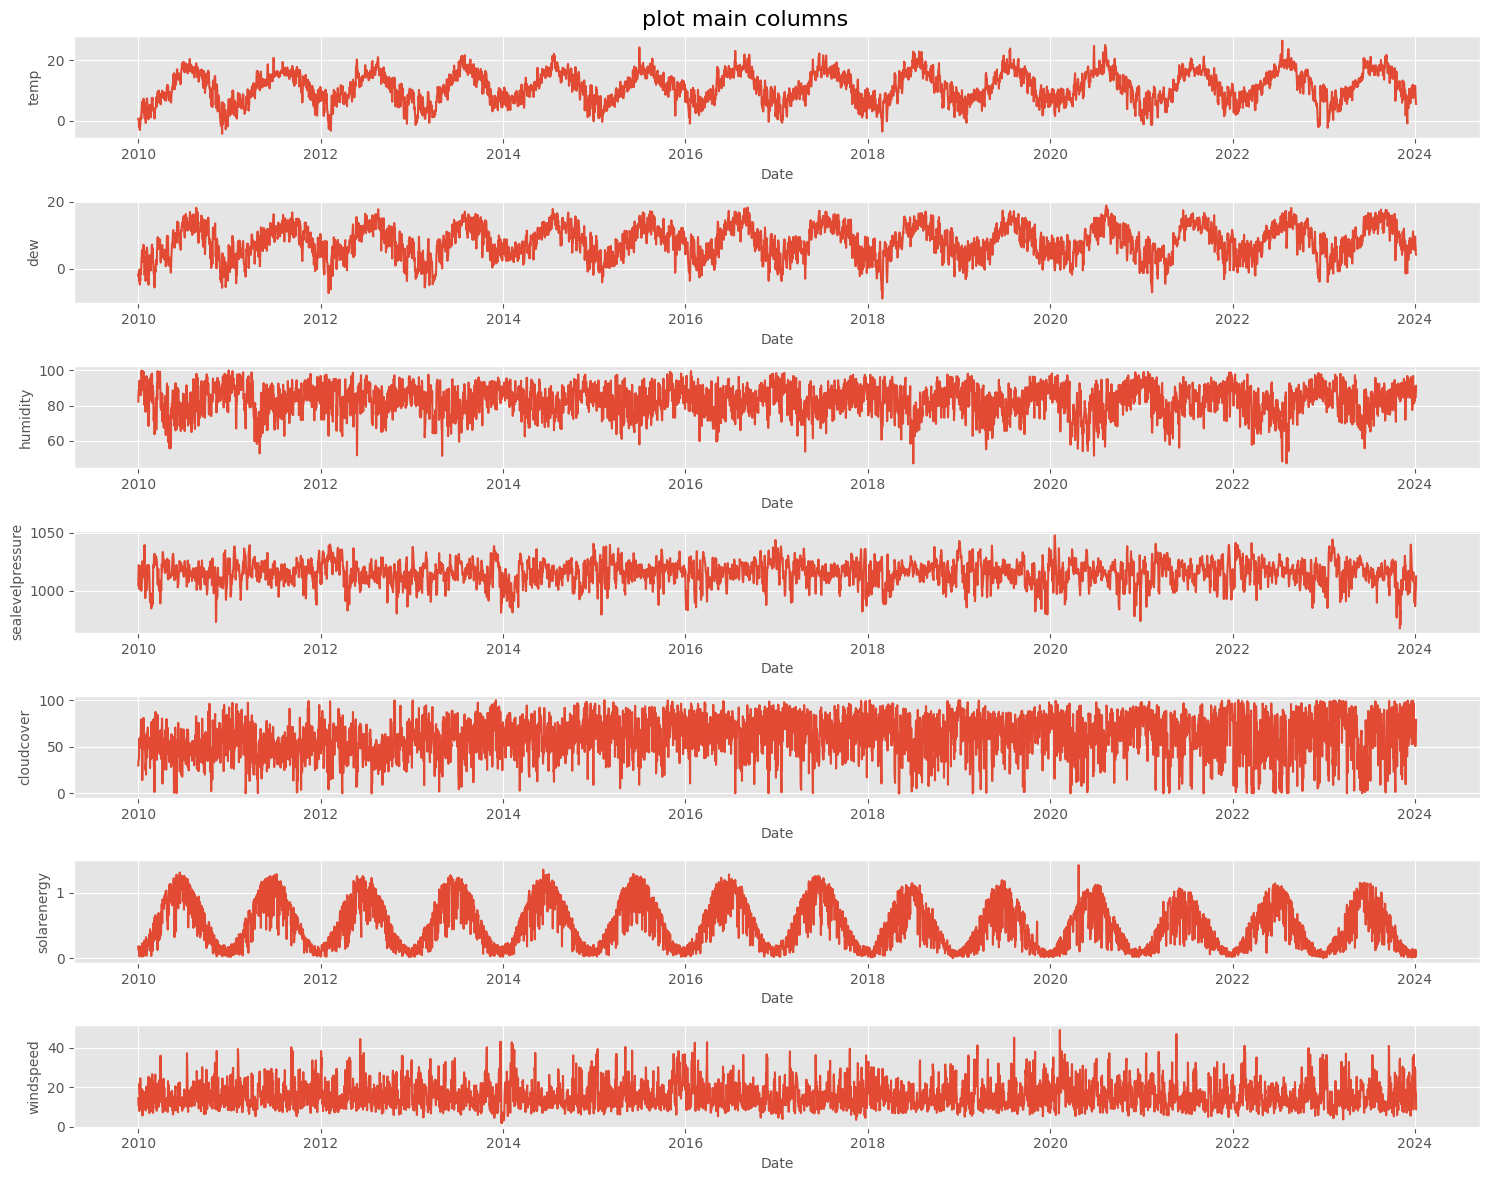

In [34]:
# Defining columns to be plotted from DataFrame 'd1'
core_columns = d1[['temp','dew','humidity','sealevelpressure','cloudcover','solarenergy','windspeed']]

f, ax = plt.subplots(nrows=7, ncols=1, figsize=(15, 12))
f.suptitle('plot main columns', fontsize=16)

for i, column in enumerate(core_columns):

    # Grouping data by date and calculating average value for each column
    plt_all = d1.groupby(d1['datetime'].dt.date)[column].mean().reset_index()
    sns.lineplot( x=plt_all['datetime'], y=plt_all[column],ax=ax[i])
    ax[i].set_xlabel('Date', fontsize=10)
    ax[i].set_ylabel(ylabel=column, fontsize=10)


plt.tight_layout()
plt.show()

### Handle Missing Values

In [4]:
# print How many missing values in each columns
print(d1.isnull().sum())

datetime                 0
temp                   254
dew                    276
humidity               269
precip                 279
precipprob             286
preciptype          111567
snow                 33034
snowdepth            33565
windspeed              261
winddir                277
sealevelpressure       525
cloudcover             288
solarradiation         330
solarenergy            364
uvindex                358
Year                     0
Month                    0
Day                      0
hour                     0
dtype: int64


### Get missing values and find what is the best way to fill missing values

Text(0, 0.5, 'windspeed')

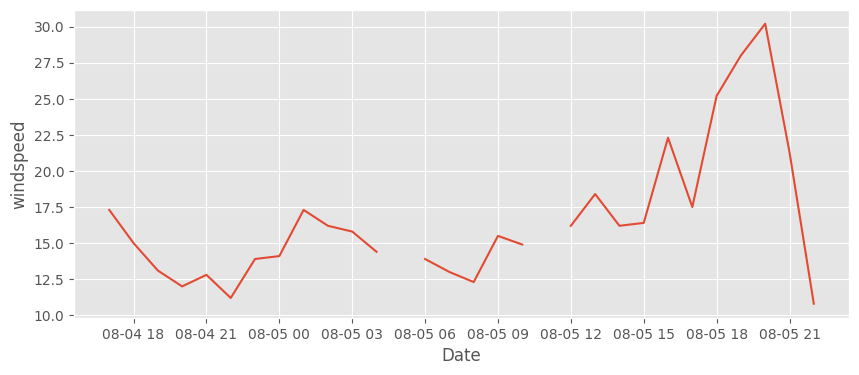

In [36]:

df2 = d1[31480:31510]

plt.figure(figsize=(10, 4))
plt.plot(df2['datetime'], df2['windspeed'])
plt.xlabel('Date')
plt.ylabel('windspeed')

C:\Users\user\AppData\Local\Temp\ipykernel_8436\1441487887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ffill'] = df2['windspeed'].ffill()
C:\Users\user\AppData\Local\Temp\ipykernel_8436\1441487887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bfill'] = df2['windspeed'].bfill()
C:\Users\user\AppData\Local\Temp\ipykernel_8436\1441487887.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Text(0.5, 1.0, 'Forward, backward, zero, and mean value fill')

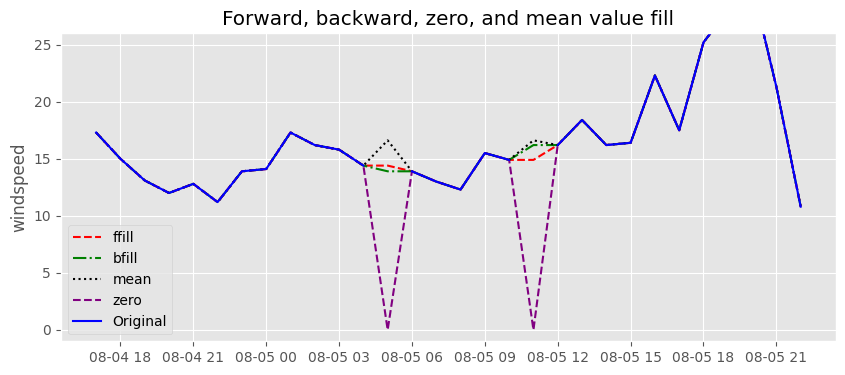

In [37]:

#Forward Fill
df2['ffill'] = df2['windspeed'].ffill()
# Backward Fill
df2['bfill'] = df2['windspeed'].bfill()
# Mean Value Fill
df2['meanfill'] = df2['windspeed'].fillna(df2['windspeed'].mean())  # Note that we're using the mean of df, not of df2
# Fill with 0s
df2['zerofill'] = df2['windspeed'].fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(10,4))

plt.plot(df2['datetime'], df2['ffill'], label='ffill', linestyle='--', color='red')
plt.plot(df2['datetime'], df2['bfill'], label='bfill', linestyle='-.', color='green')
plt.plot(df2['datetime'], df2['meanfill'], label='mean', linestyle=':', color='black')
plt.plot(df2['datetime'], df2['zerofill'], linestyle='--', color='purple', label='zero')
plt.plot(df2['datetime'], df2['windspeed'], color='blue', label='Original')
plt.legend()
plt.ylabel('windspeed')
plt.ylim(-1, 26)
plt.title('Forward, backward, zero, and mean value fill')

### Cleaning UP and fill missing values

In [5]:
# drop columns which have lot of null values
d1.drop(['precip','precipprob','preciptype','snow','snowdepth'],axis=1)

# Replace NULL values with the value from the previous row
d1=d1.ffill(axis=0)

In [7]:
# check if there any null values
print(d1.isnull().any())

datetime            False
temp                False
dew                 False
humidity            False
precip              False
precipprob          False
preciptype          False
snow                False
snowdepth           False
windspeed           False
winddir             False
sealevelpressure    False
cloudcover          False
solarradiation      False
solarenergy         False
uvindex             False
Year                False
Month               False
Day                 False
hour                False
dtype: bool


In [9]:
# save Clean data
d1.to_csv(f'{filetype}_clean_data.csv', index=False)
# d1.to_csv(f'brighton_clean_data.csv', index=False)

In [40]:
# discription of the data
d1.describe()

,datetime,temp,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,Year,Month,Day,hour
count,122844,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000,122844.000000
mean,2017-01-03 06:05:12.103155200,11.058876,8.048950,82.878888,0.081860,8.882811,0.000315,12.019436,15.938191,196.541317,1015.528965,60.838583,138.685149,0.498877,1.369607,2016.507766,6.518235,15.715013,11.499414
min,2010-01-01 00:00:00,-9.100000,-11.600000,24.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,955.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,1.000000,1.000000,0.000000
25%,2013-07-03 15:45:00,7.200000,4.500000,75.550000,0.000000,0.000000,0.000000,0.000000,9.400000,113.000000,1009.600000,36.000000,0.000000,0.000000,0.000000,2013.000000,4.000000,8.000000,5.000000
50%,2017-01-03 05:30:00,11.000000,8.400000,85.700000,0.000000,0.000000,0.000000,0.000000,14.400000,223.000000,1016.400000,68.400000,9.000000,0.000000,0.000000,2017.000000,7.000000,16.000000,11.000000
75%,2020-07-05 21:15:00,15.300000,12.000000,92.790000,0.000000,0.000000,0.000000,0.000000,21.300000,267.000000,1022.500000,89.800000,201.000000,0.700000,2.000000,2020.000000,10.000000,23.000000,17.000000
max,2024-01-06 11:00:00,33.300000,20.200000,100.000000,32.385000,100.000000,7.870000,96.000000,72.200000,360.000000,1049.300000,100.000000,1150.000000,4.100000,10.000000,2024.000000,12.000000,31.000000,23.000000
std,NaN,5.654247,5.135494,12.510623,0.660096,28.449663,0.030089,30.291035,8.903265,106.279600,10.515728,31.880362,220.839448,0.795782,2.226344,4.036078,3.451485,8.804550,6.922215


## Data Exploration

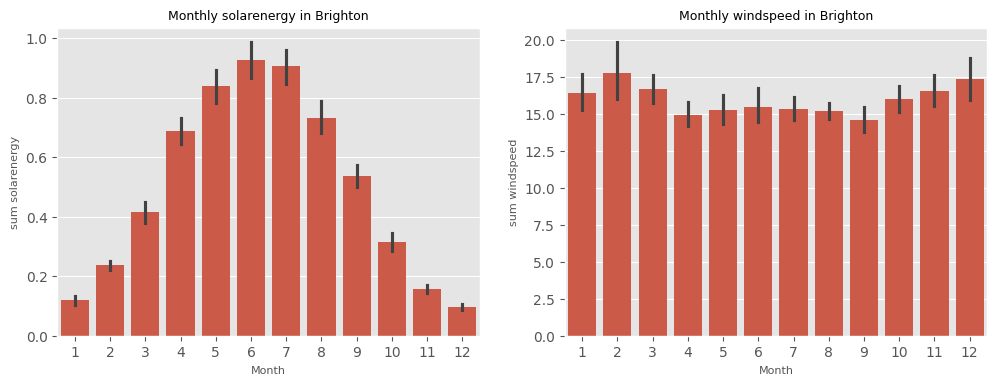

In [41]:
# Plot average solarenergy and windspeed over all the years.
# We can see the highest solar energy generates in May, June, July and Aug.
# Wind speed is highest in February and December compared to other months. 

solar = d1.groupby(['Year','Month'])['solarenergy'].mean().reset_index()
wind = d1.groupby(['Year','Month'])['windspeed'].mean().reset_index()

f,ax = plt.subplots(nrows = 1,ncols = 2,figsize=(12,4))
# plt.figure(figsize=(6, 3))
sns.barplot(data=solar, x='Month', y='solarenergy',ax=ax[0])
ax[0].set_title('Monthly solarenergy in Brighton', fontsize=9)
ax[0].set_xlabel('Month', fontsize=8)
ax[0].set_ylabel('sum solarenergy', fontsize=8)


sns.barplot(data=wind, x='Month', y='windspeed',ax=ax[1])
# Customizing the plot
ax[1].set_title('Monthly windspeed in Brighton', fontsize=9)
ax[1].set_xlabel('Month', fontsize=8)
ax[1].set_ylabel('sum windspeed', fontsize=8)

plt.show()

#### Hourly Solar Energy Analysis Over the Year

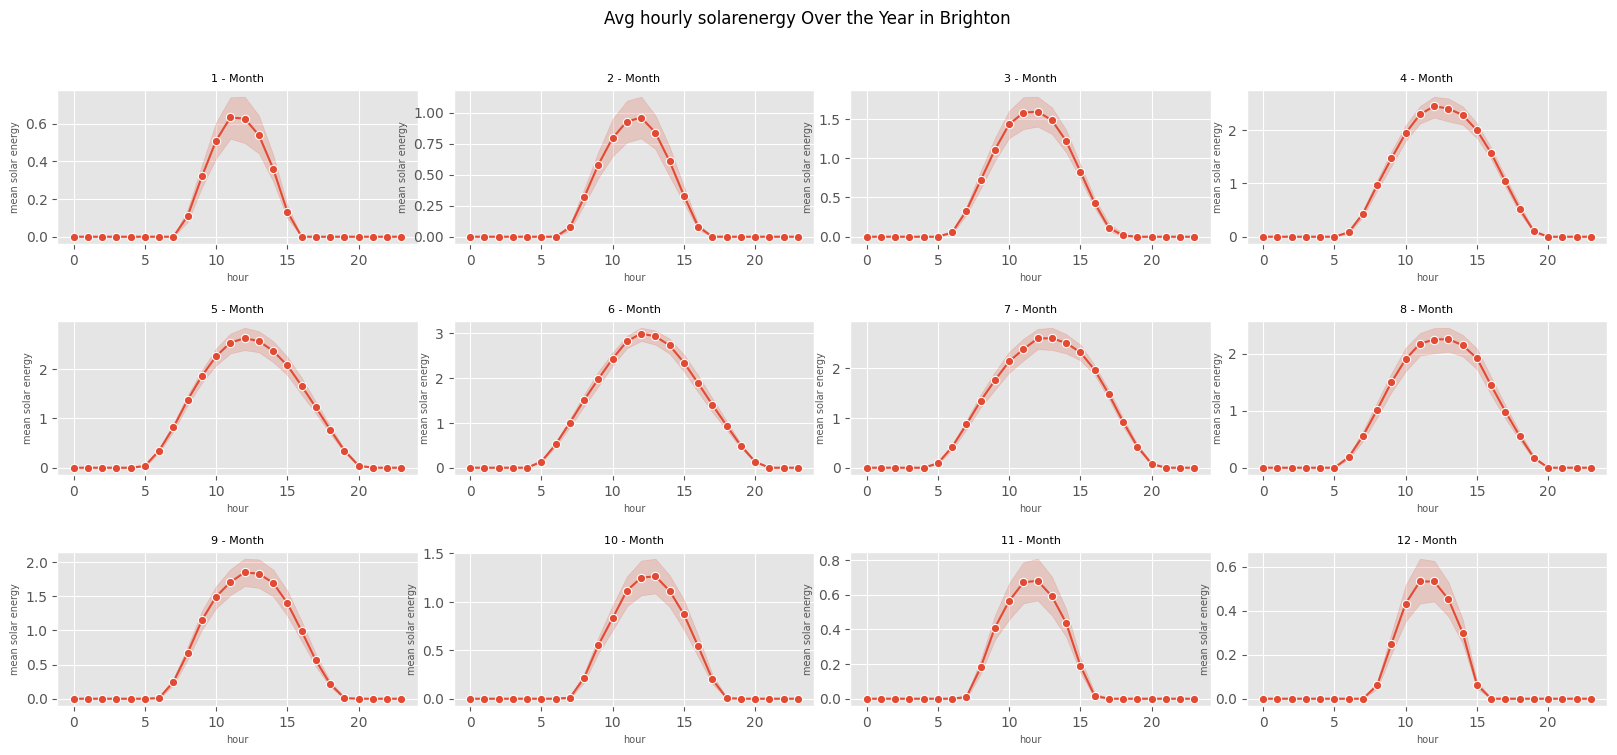

In [42]:

# It shows that 10 to 13 hours generate more solar energy, and this increases from 9 to 16 hours in April, May, June, July, and August.

fig, axs = plt.subplots(3,4, figsize=(20, 8))
fig.subplots_adjust(hspace = .5, wspace=.1)
fig.suptitle('Avg hourly solarenergy Over the Year in Brighton')
axs = axs.ravel()
aa=0
for i  in range(12):
    aa=i+1

    # select the year
    a = d1.loc[(d1['Year'] == 2010) & (d1['Month'] == aa)  ]
    
    year_month_temp = a.groupby(['Day','hour'])['solarenergy'].mean().reset_index()

    sns.lineplot(data=year_month_temp, x='hour', y='solarenergy', marker='o',ax=axs[i]) #, hue='Day', palette=custom_palette
    # Customizing the plot   
    axs[i].set_xlabel('hour', fontsize=7)
    axs[i].set_ylabel('mean solar energy', fontsize=7)
    axs[i].set_title(f'{aa} - Month', fontsize=8)

#### Hourly windspeed Analysis Over the Year

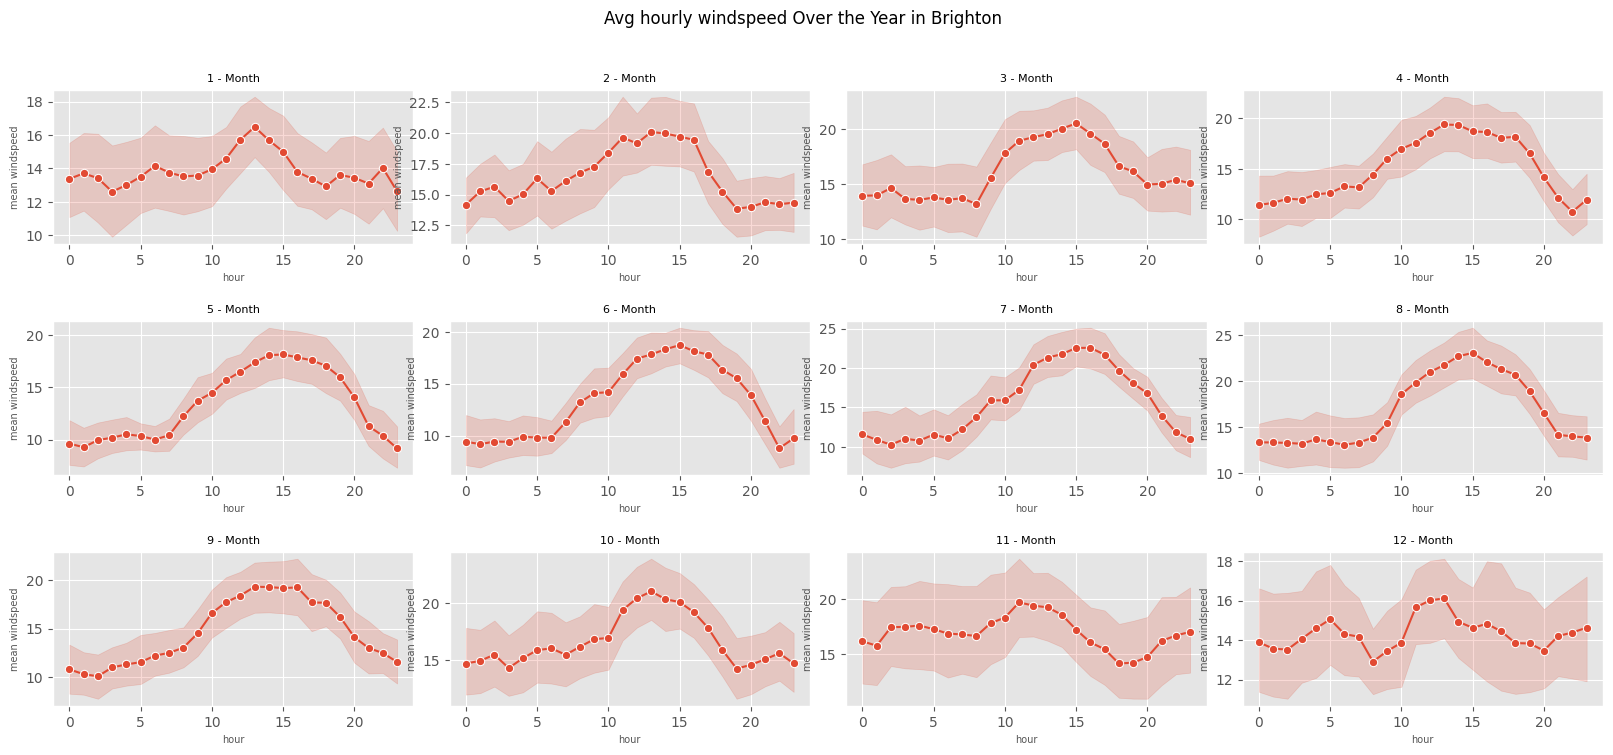

In [43]:
# It shows that 11 to 14 hours wind speed is more higher, and this increases from 10 to 17 hours in April, May, June, July,August, September.

fig, axs = plt.subplots(3,4, figsize=(20, 8))
fig.subplots_adjust(hspace = .5, wspace=.1)
fig.suptitle('Avg hourly windspeed Over the Year in Brighton')
axs = axs.ravel()
aa=0
for i  in range(12):
    aa=i+1
    a = d1.loc[(d1['Year'] == 2010) & (d1['Month'] == aa)]
    
    year_month_temp = a.groupby(['Day','hour'])['windspeed'].mean().reset_index()

    sns.lineplot(data=year_month_temp, x='hour', y='windspeed', marker='o',ax=axs[i]) #, hue='Day', palette=custom_palette
    # Customizing the plot   
    axs[i].set_xlabel('hour', fontsize=7)
    axs[i].set_ylabel('mean windspeed', fontsize=7)
    axs[i].set_title(f'{aa} - Month', fontsize=8)

### Use decomposition techniques to Check the Stationary, trend and noise

In [44]:
# Extracting Data for January 2023
df_new = d1.loc[(d1['Year'] == 2023) & (d1['Month'] == 1) ] #& (d1['Month'] == 1) & (d1['Day'] < 20)
df_new = df_new[['datetime','windspeed','solarenergy']]
df_new.set_index('datetime', inplace=True)
df_new

,windspeed,solarenergy
datetime,,
2023-01-01 00:00:00,33.0,0.0
2023-01-01 01:00:00,29.7,0.0
2023-01-01 02:00:00,29.6,0.0
2023-01-01 03:00:00,26.4,0.0
2023-01-01 04:00:00,29.0,0.0
...,...,...
2023-01-31 19:00:00,10.7,0.0
2023-01-31 20:00:00,12.1,0.0
2023-01-31 21:00:00,13.8,0.0


In [45]:
# Trend: The trend component represents the long-term movement in the data, representing the underlying pattern.
# Seasonality: The seasonality component represents the repeating, short-term fluctuations caused by factors like seasons or cycles.
# Residual (Noise): The residual component represents random variability that remains after removing the trend and seasonality.

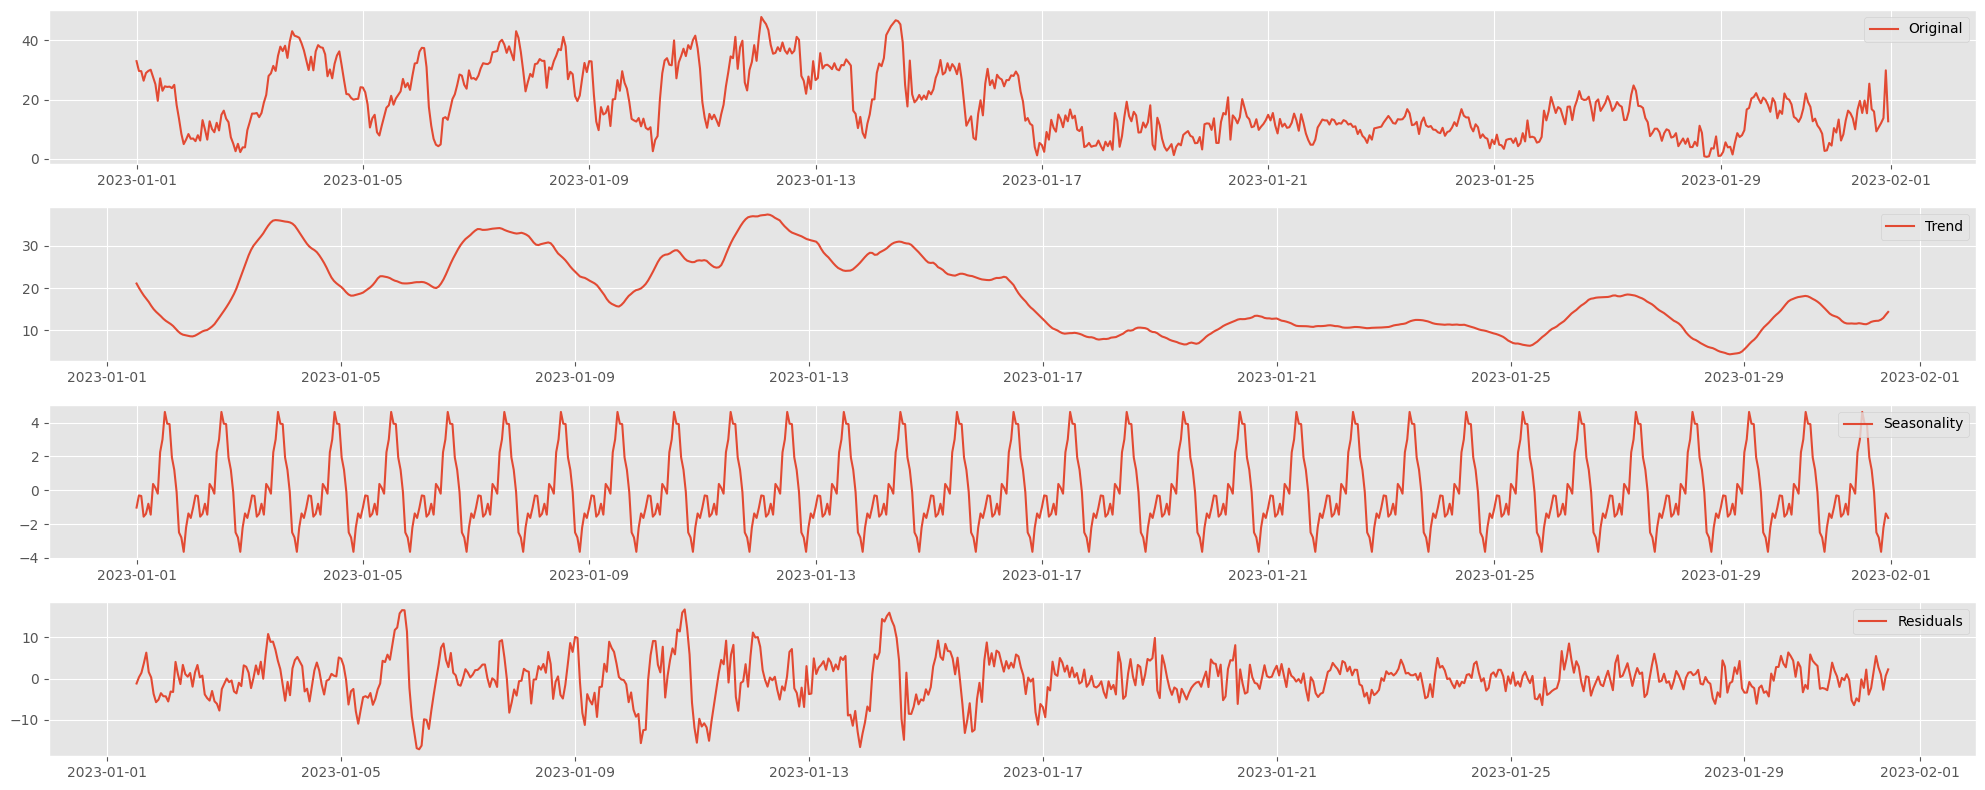

In [46]:
# Perform seasonal decomposition windspeed
decomposition = seasonal_decompose(df_new['windspeed'], model='additive')

# Plot the original time series and the decomposed components
plt.figure(figsize=(20, 8))

plt.subplot(411)
plt.plot(df_new['windspeed'], label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
# plt.xticks(range(1, 48)) 
plt.show()

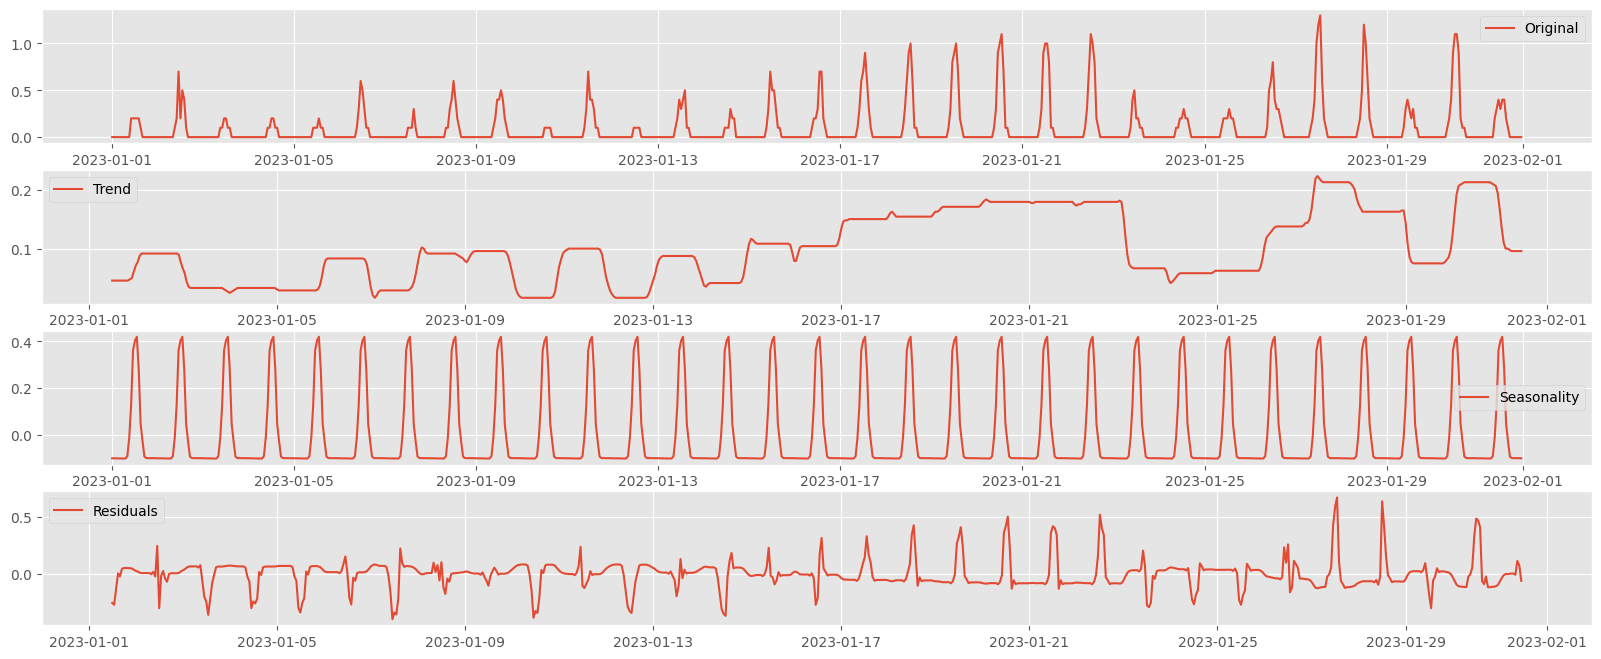

In [47]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df_new['solarenergy'], model='additive')

# Plot the original time series and the decomposed components
plt.figure(figsize=(20, 8))

plt.subplot(411)
plt.plot(df_new['solarenergy'], label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

In [48]:
# the plots above that there's periodicity, so in this case the time series is NOT stationary

#### AutoCorrelation Plots in solar energy
#### In the graph below, we can observe a gradual decline, indicating that the data is not stationary.

Text(0, 0.5, 'Autocorrelation')

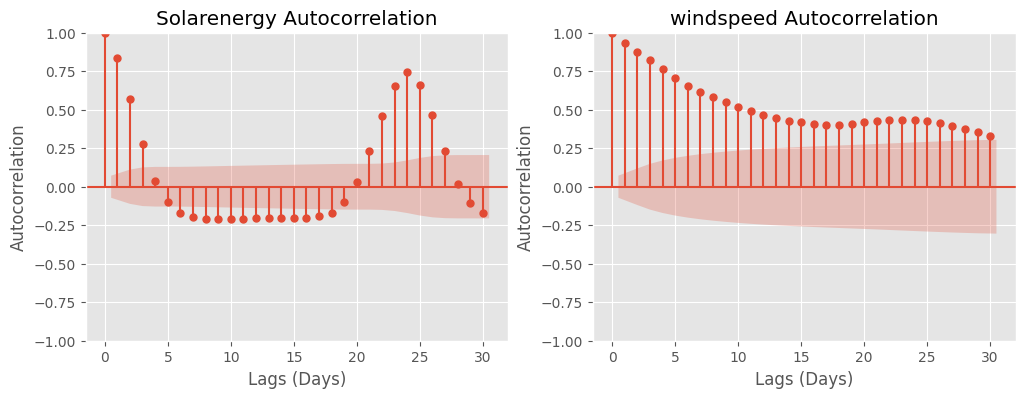

In [49]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
plot_acf(df_new['solarenergy'], lags=30 ,ax=ax[0])  # each lag is one month windspeed
ax[0].set_xlabel('Lags (Days)')
ax[0].set_title('Solarenergy Autocorrelation')
ax[0].set_ylabel('Autocorrelation')

plot_acf(df_new['windspeed'], lags=30 ,ax=ax[1])  # each lag is one month 
ax[1].set_xlabel('Lags (Days)')
ax[1].set_title('windspeed Autocorrelation')
ax[1].set_ylabel('Autocorrelation')


#### Using differencing technique operation we can make it stationary

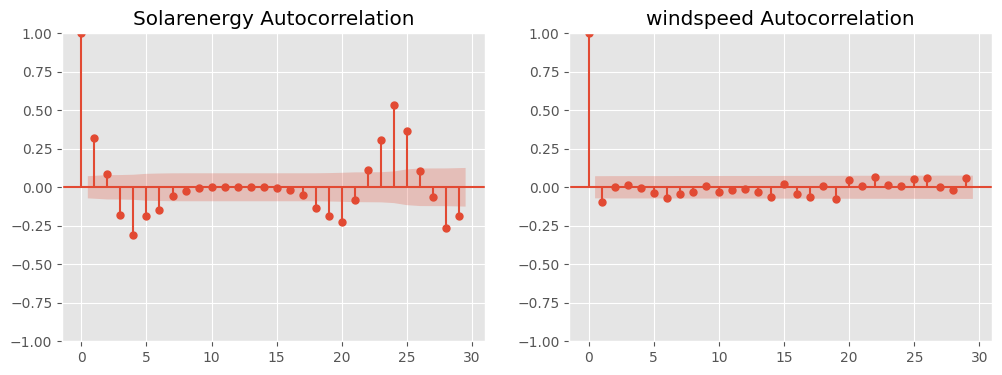

In [50]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
# difference by one order
solarenergy = df_new['solarenergy'].diff(periods=1)
plot_acf(solarenergy[1:], ax=ax[0])
ax[0].set_title('Solarenergy Autocorrelation')


windspeed = df_new['windspeed'].diff(periods=1)
plot_acf(windspeed[1:], ax=ax[1])
ax[1].set_title('windspeed Autocorrelation')

plt.show()

## Thresholds Value for calculate Wind energy and solar energy

### Assumptions

In [51]:
#### Wind Energy and Power Calculations
# https://www.e-education.psu.edu/emsc297/node/649

# Power (W) = 1/2 x ρ x A x v3
# ρ = density of the air in kg/m3  -The standard density of air is 1.225 kg/m3
# A = The turbine has a 24 m diameter, which means the radius is 12 m. Thus, 
#     the swept area of the turbine is: (pi)r2 = 3.14159(122) = 452.4 m2
# v = velocity of the wind in m/s
### The power in the wind at 6 m/s is: 1/2 x ρ x A x v3 = 0.5 x 1.225 kg/m3 x 452.4 m2 x (6 m/s)3 = 59,851 W = 59.85 kW

# number of houses in 

# https://www.postcodearea.co.uk/postaltowns/brighton/bn5/
# houses - 3,067

# https://www.ukpower.co.uk/home-energy/average-household-gas-and-electricity-usage
# average electricity usage per month in UK households is about 350kWh.
# Daily usage 350/31 = 11.29 Kwh
# yearly 350*12 = 4200 KWh


# Total energy need in brighton-bn5 area in yearly
# 4200 * 3067 ~= 12,881,400 kwh

# assuming 750 housholders to provide energy
# 4200* 750 = 3,150,000


# in our 2,812,134 +298,000 = 3,110,134



In [60]:

# convert windspeed  kilometers per hour to miles per hour
def kph_to_ms(kph):
    return (0.277778 * kph)

# Convert solar energy megaW to kilowatt
def mw_to_kw(mw,panels=4):
    return (1000 * mw * panels)

# Convert solar energy microjoule to kilowatt
# def mj_to_kwh(mj):
#     return (0.277778 * mj)

def wind_energy_cal(v3, ρ = 1.225, A=452.4):
    # v3 = (kph_to_ms(v3))**3
    v3 = v3**3
    power_kw = (0.5 * ρ * A * v3)/1000
    return power_kw

In [61]:
# Adding New columns
d1['windenergy_kWh'] = wind_energy_cal(d1['windspeed'])
d1['solarenergy_kWh'] = mw_to_kw(d1['solarenergy'])
d1.head()


,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,...,cloudcover,solarradiation,solarenergy,uvindex,Year,Month,Day,hour,windenergy_kWh,solarenergy_kWh
0,2010-01-01 00:00:00,1.9,-0.5,84.25,0.417,100.0,"rain,snow",0.0,0.0,19.4,...,62.2,0.0,0.0,0.0,2010,1,1,0,2023.176999,0.0
1,2010-01-01 01:00:00,1.9,-0.5,83.90,0.000,0.0,"rain,snow",0.0,0.0,21.8,...,22.4,0.0,0.0,0.0,2010,1,1,1,2870.768486,0.0
2,2010-01-01 02:00:00,1.4,-0.7,85.76,0.000,0.0,"rain,snow",0.0,0.0,17.7,...,38.0,0.0,0.0,0.0,2010,1,1,2,1536.556338,0.0
3,2010-01-01 03:00:00,1.4,-0.7,85.69,0.000,0.0,"rain,snow",0.0,0.0,18.0,...,66.7,0.0,0.0,0.0,2010,1,1,3,1616.018040,0.0
4,2010-01-01 04:00:00,1.3,-0.8,85.72,0.000,0.0,"rain,snow",0.0,0.0,17.4,...,62.8,0.0,0.0,0.0,2010,1,1,4,1459.743110,0.0


In [64]:
a = d1.loc[(d1['Year'] == 2023) ] #& (train_df['Month'] == 2) & (train_df['Day'] < 10) ]
year_month_temp = a.groupby(['Year', 'Month'])['solarenergy_kWh'].sum().reset_index()
year_month_temp

,Year,Month,solarenergy_kWh
0,2023,1,298000.0
1,2023,2,537600.0
2,2023,3,778800.0
3,2023,4,1751200.0
4,2023,5,2455200.0
5,2023,6,2705600.0
6,2023,7,2036000.0
7,2023,8,1846000.0
8,2023,9,1451600.0
9,2023,10,799600.0


In [56]:
year_month_temp = a.groupby(['Year', 'Month'])['windenergy_kWh'].sum().reset_index()
year_month_temp

,Year,Month,windenergy_kWh
0,2023,1,2.812134e+06
1,2023,2,6.939038e+05
2,2023,3,2.208563e+06
3,2023,4,1.504885e+06
4,2023,5,1.048431e+06
5,2023,6,1.177635e+06
6,2023,7,2.651883e+06
7,2023,8,1.229872e+06
8,2023,9,1.758255e+06
9,2023,10,1.403383e+06


### ploting new columns 

#### below plot are showing the total monthly solar and wind energy generated (in KWH) over multiple years and visualizes the trends using a line plot. The data is sourced from the DataFrame 'd1', which contains information about solar and wind energy generated broken down by year and month.

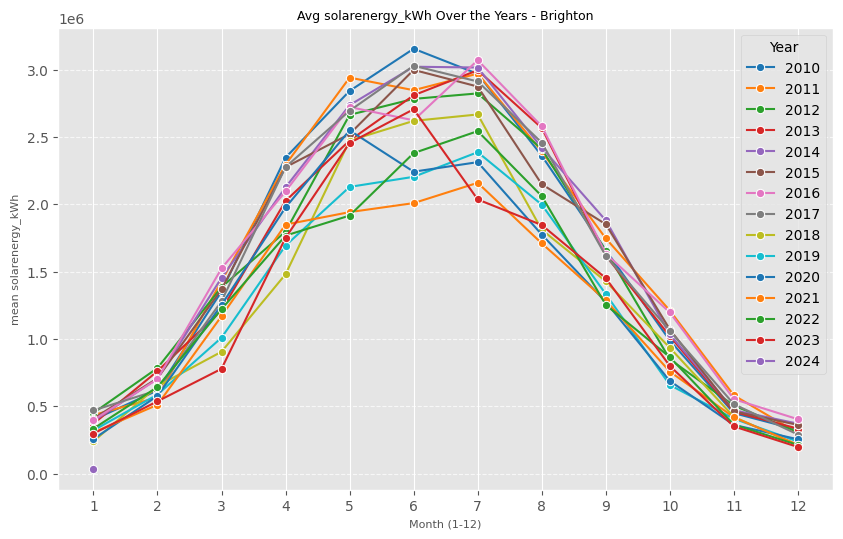

In [62]:
year_month_temp = d1.groupby(['Year', 'Month'])['solarenergy_kWh'].sum().reset_index()

custom_palette = sns.color_palette("tab10", n_colors=len(year_month_temp['Year'].unique()))

# line plot with custom line colors
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_month_temp, x='Month', y='solarenergy_kWh', hue='Year', marker='o', palette=custom_palette)

# Customizing the plot
plt.title('Avg solarenergy_kWh Over the Years - Brighton', fontsize=9)
plt.xlabel('Month (1-12)', fontsize=8)
plt.ylabel('mean solarenergy_kWh', fontsize=8)
plt.xticks(range(1, 13))  # Ensure x-axis displays all months (1-12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.legend(title='Year')

plt.show()

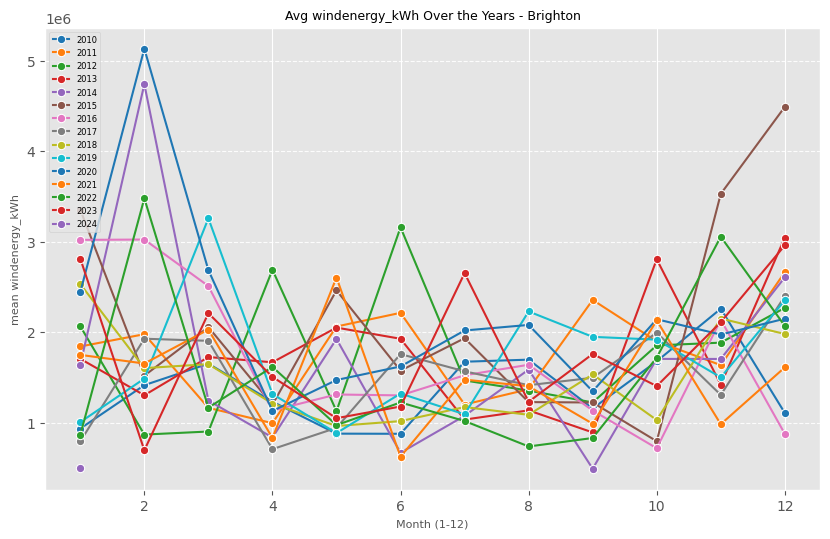

In [63]:
year_month_temp = d1.groupby(['Year', 'Month'])['windenergy_kWh'].sum().reset_index()

custom_palette = sns.color_palette("tab10", n_colors=len(year_month_temp['Year'].unique()))

# line plot with custom line colors
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_month_temp, x='Month', y='windenergy_kWh',  hue='Year',marker='o', palette=custom_palette)

# Customizing the plot
plt.title('Avg windenergy_kWh Over the Years - Brighton', fontsize=9)
plt.xlabel('Month (1-12)', fontsize=8)
plt.ylabel('mean windenergy_kWh', fontsize=8)
# plt.xticks(range(1, 13))  # Ensure x-axis displays all months (1-12)
plt.grid(axis='y', linestyle='--', alpha=0.9)  # Add grid lines for better readability
plt.legend(loc='upper left', fontsize=6)

plt.show()